### Explanation of the data set:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
<hr>

### Import libraries for data analysis and exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load the data set

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/bank-full.csv',sep=';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


##### Data Information
* There are 45211 observations with 17 columns
* <b>y</b> is the target columns as per data description
* 7 Columns are numeric and 10 are object, so we have to convert them into numeric too
* There is no missing values

In [6]:
data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

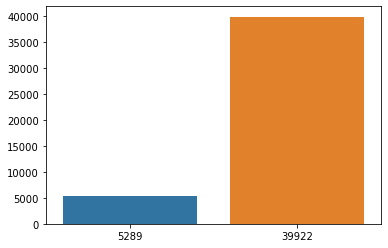

In [7]:
sns.barplot(x=[39922,5289],y=data.y.value_counts().values)

* Mainly there are many clients said no the bank terms 
* Very few clients said yes for bank terms 

* Target is discret/categorical so it is a classification problem

### Data Preprocessing
* Convert Categorical values in numeric

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
cat_data = data.select_dtypes(include=['object'])

In [10]:
data[cat_data.columns.values] = OrdinalEncoder().fit_transform(cat_data)

* Showing the correlation matrix, <b> Correlation ranges from -1 to 1. The diagonal of the correlation matrix is always 1, orrelation ranges from -1 to 1. The diagonal of the correlation matrix is always 1<b> 


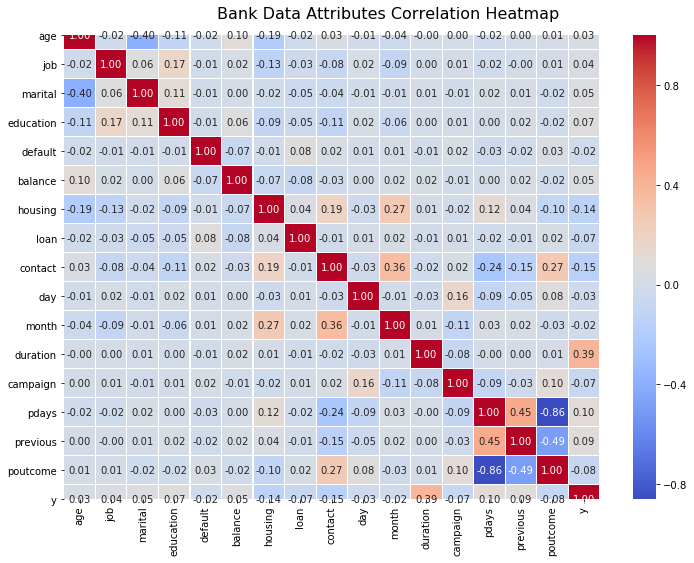

In [11]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(12,8))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.06)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bank Data Attributes Correlation Heatmap', fontsize=16)

### Visualize useful information

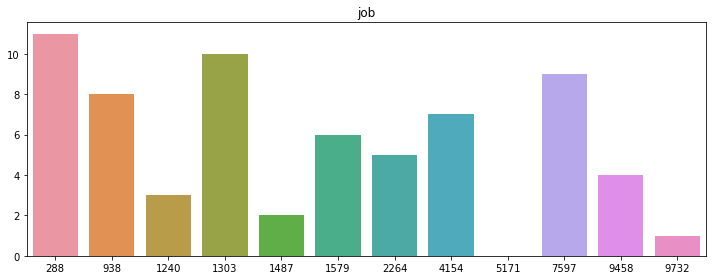

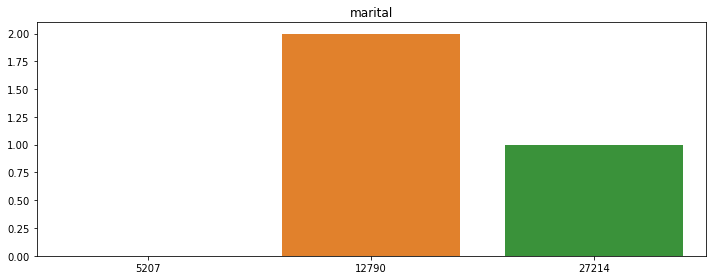

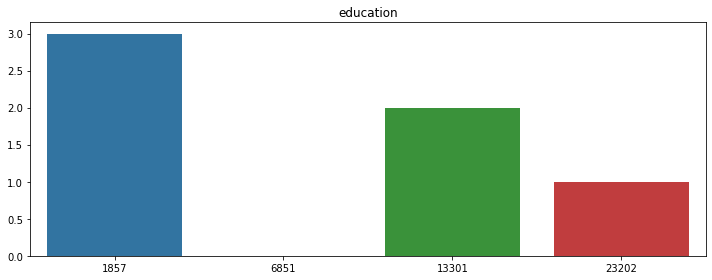

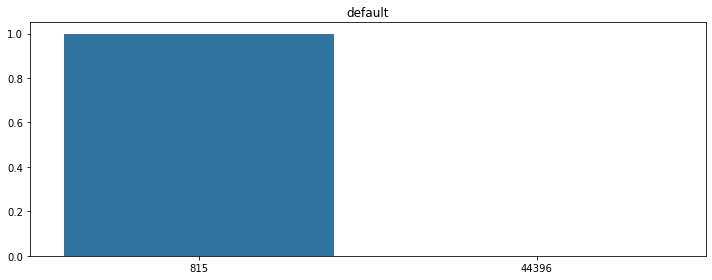

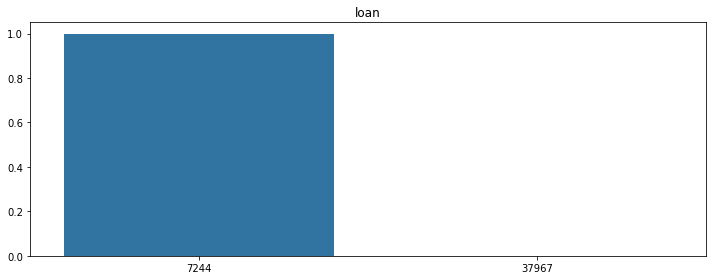

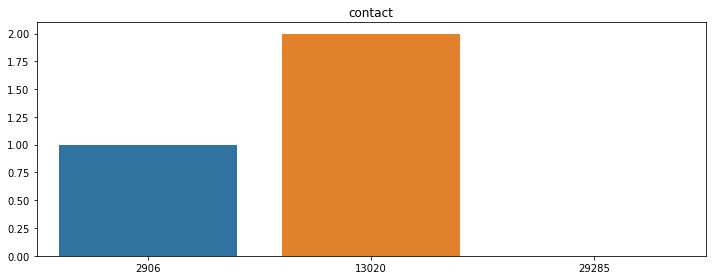

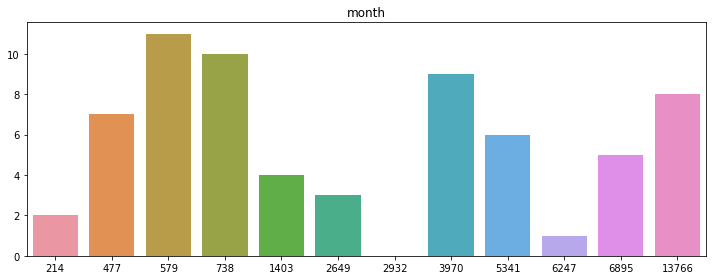

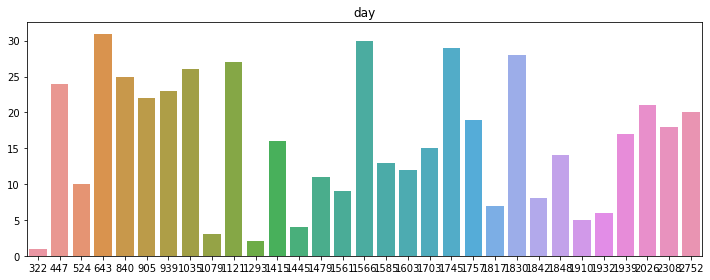

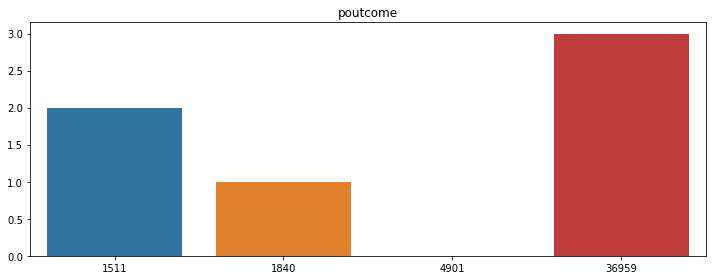

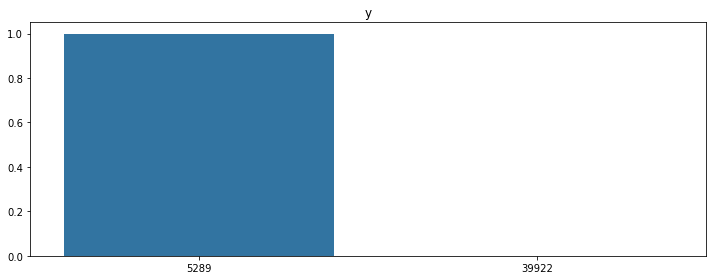

In [12]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

### Separate target data and feature data 

In [13]:
# feature_data and target data
feature = data.drop(columns=['y'])
target = data.y

### Split the data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
trainX, testX, trainY, testY = train_test_split(feature,target)

### Use Hybrid Methods for feature Selection
* A hybrid feature selection method is proposed for classification in small sample size data sets.

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt = DecisionTreeClassifier()

In [18]:
dt.fit(trainX,trainY)

DecisionTreeClassifier()

In [19]:
feature_importances = pd.Series(dt.feature_importances_,index=feature.columns.values)

In [20]:
feature_importances

age          0.109075
job          0.041549
marital      0.017374
education    0.023936
default      0.001745
balance      0.117346
housing      0.015721
loan         0.009382
contact      0.019468
day          0.088000
month        0.094854
duration     0.295438
campaign     0.038536
pdays        0.063646
previous     0.012035
poutcome     0.051897
dtype: float64

In [21]:
top_feature_imortances = list(feature_importances.sort_values(ascending=False)[:8].index)

In [22]:
features_data = data[top_feature_imortances]

### Building the Model

#### Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier(n_estimators=1000)

In [25]:
trainX,testX,trainY,testY = train_test_split(features_data,target)

In [26]:
rf.fit(trainX,trainY)

RandomForestClassifier(n_estimators=1000)

In [27]:
print(rf.score(trainX,trainY))
print(rf.score(testX,testY))

1.0
0.9076351411129788


#### Decision Tree Classifier

In [28]:
dt.fit(trainX,trainY)

DecisionTreeClassifier()

In [29]:
print(dt.score(trainX,trainY))
print(dt.score(testX,testY))

1.0
0.8718924179421392


####  Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(trainX,trainY)

C:\Users\TARUN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [33]:
print(lr.score(trainX,trainY))
print(lr.score(testX,testY))

0.8866639141205616
0.8868442006546935


#### Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
for k in range(1,8):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trainX,trainY)
    print(knn.score(trainX,trainY))
    print(knn.score(testX,testY))
    print('-')

1.0
0.8540210563567194
-
0.92305650583933
0.8868442006546935
-
0.9242361684558217
0.8782624082102097
-
0.9100507254925091
0.8862248960452977
-
0.910846997758641
0.8850747589135628
-
0.9037690220596909
0.886755728567637
-
0.9050371593724195
0.8865787843935239
-


### Conclusion
Logistic Regression seem to be the best model with <b>train score: 0.8866</b> and <b>test score: 0.8868</b>